In [1]:
import torch

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


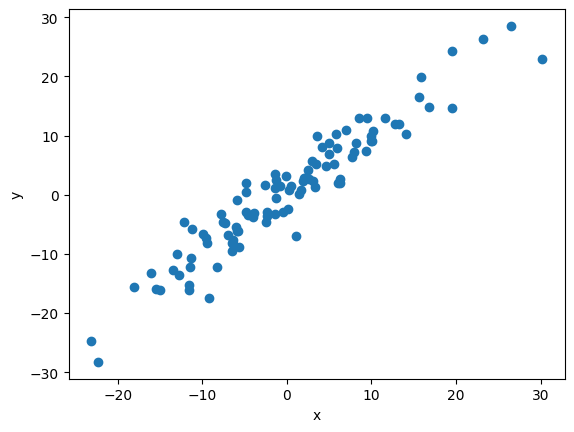

In [2]:
# regression with pytorch

# create a dataset
x = torch.randn(100, 1) * 10
y = x + 3 * torch.randn(100, 1)

# plot the data
import matplotlib.pyplot as plt
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


epoch: 0 loss: 33.402976989746094
epoch: 1 loss: 35.31824493408203
epoch: 2 loss: 37.399658203125
epoch: 3 loss: 39.661216735839844
epoch: 4 loss: 42.11807632446289


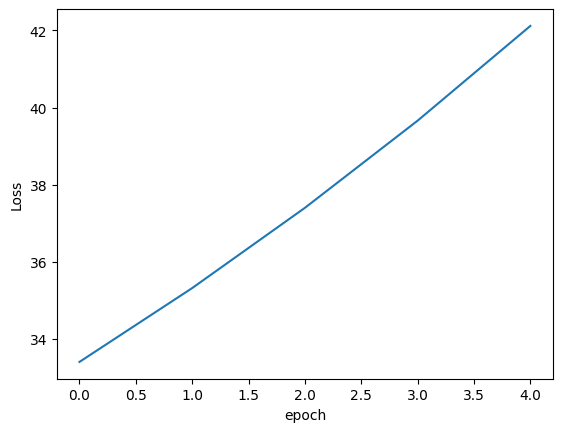

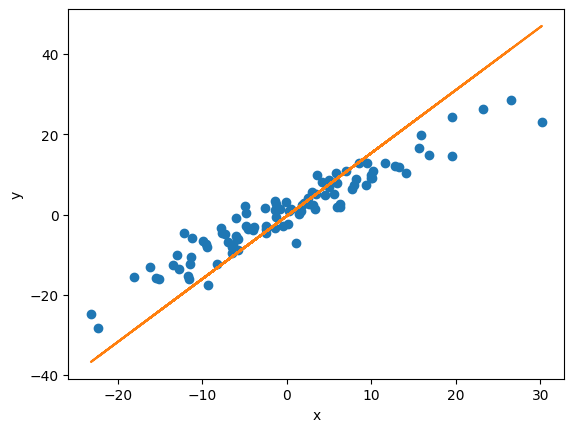

In [10]:
# create a model
import torch.nn as nn
# LR = Linear Regression Model Class it inherits from nn.Module class 
# nn.Module is the base class for all neural network modules in PyTorch
# nn.Module has two methods: __init__ and forward
# __init__ is the constructor of the class
# forward is the method that defines the forward pass of the model
# the forward pass is the process of computing the output of the model
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # nn.Linear is a linear layer that applies a linear transformation to the incoming data
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        # x is the input data and it is a tensor of shape (batch_size, input_size) 

        pred = self.linear(x)
        return pred

torch.manual_seed(1)
# create a model object from the LR class  
# the model has one input and one output 
model = LR(1, 1)

# loss and optimizer
criterion = nn.MSELoss()
# SGD is the stochastic gradient descent optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# train the model
epochs = 5
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    # backpropagation : compute the gradient of the loss with respect to all the learnable parameters
    # the gradients are stored in the .grad attribute of a parameter
    loss.backward()
    # update the parameters using the gradients computed by the backward method 
    optimizer.step()

# plot the loss
# convert to numpy
losses = [l.item() for l in losses]
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

# plot the predictions of the graph 
plt.plot(x.numpy(), y.numpy(), 'o')
plt.plot(x.numpy(), model.forward(x).detach().numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.show()
